In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
## Common imports
import sys
import sklearn # scikit-learn
import os
import scipy
## plot
import matplotlib as mpl
import matplotlib.pyplot as plt
## 分割資料
from sklearn import datasets
from sklearn.model_selection import train_test_split

## modelbuilding 模型套件
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import plot_tree #圖
from sklearn import tree




In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

col_names = ['證券代碼', '簡稱', '年月', '市值(百萬元)', 
             '收盤價(元)_年', '本益比', '股價淨值比', '股價營收比', 
             'M淨值報酬率─稅後', '資產報酬率ROA', '營業利益率OPM', 
             '利潤邊際NPM', '負債/淨值比', 'M流動比率', 'M速動比率', 
             'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M營業利益成長率', 
             'M稅後淨利成長率', 'Return', 'ReturnMean_year_Label']
# load dataset
file_path = r"C:\Users\sherr\python\人工智慧與金融科技\top200_year\top200_1997.xlsx"
df = pd.read_excel(file_path,names=col_names)

feature_cols = ['市值(百萬元)', 
             '收盤價(元)_年', '本益比', '股價淨值比', '股價營收比', 
             'M淨值報酬率─稅後', '資產報酬率ROA', '營業利益率OPM', 
             '利潤邊際NPM', '負債/淨值比', 'M流動比率', 'M速動比率', 
             'M存貨週轉率 (次)', 'M應收帳款週轉次', 'M營業利益成長率', 
             'M稅後淨利成長率']
# feature_cols = ['股價營收比', '利潤邊際NPM', 'M速動比率']
# feature_cols = ['市值(百萬元)', '收盤價(元)_年', '本益比', '股價營收比', 'M淨值報酬率─稅後', '資產報酬率ROA', '利潤邊際NPM', 'M速動比率']
# feature_cols=['本益比', '股價營收比', 'M淨值報酬率─稅後', '利潤邊際NPM', '負債/淨值比', 'M流動比率', 'M速動比率','M存貨週轉率 (次)']
target = ['ReturnMean_year_Label']

x_train=df[feature_cols]
y_train=df[target]

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Print or visualize feature importances
for feature, importance in zip(feature_cols, feature_importances):
    print(f"{feature}: {importance}")
# 找到前三大最重要的特徵
sorted_feature_importances = sorted(zip(feature_cols, feature_importances), key=lambda x: x[1], reverse=True)
top_three_features = sorted_feature_importances[:3]

# 印出前三大最重要的特徵及其重要性
print("Top three most important features:")
for feature, importance in top_three_features:
    print(f"{feature}: {importance}")

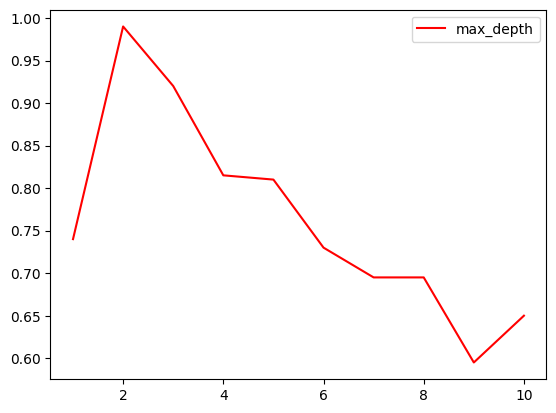

In [5]:
y_eff = []
for i in range(10):   # 測試的條件數
    tree_clf = tree.DecisionTreeClassifier(criterion="entropy"
                                          ,random_state = None
                                          ,max_depth = i+1   #測試條件
                                          )
    tree_clf = tree_clf.fit(x_train,y_train)
    score = tree_clf.score(x_test,y_test)
    y_eff.append(score)
plt.plot(range(1,11),y_eff,color="red",label="max_depth")
plt.legend()
plt.show()

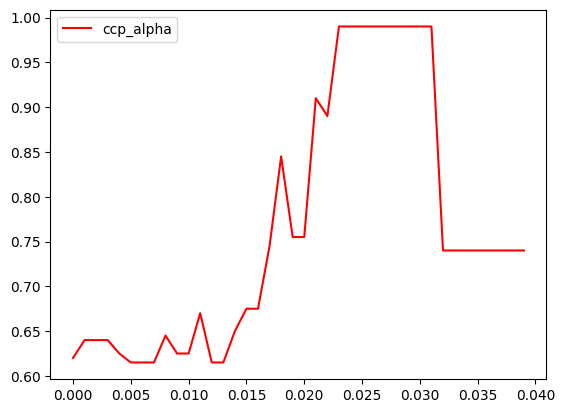

In [9]:
y_eff = []
for i in np.arange(0, 0.04, 0.001):  # Use numpy.arange for float values
    tree_clf = tree.DecisionTreeClassifier(criterion="entropy",
                                           random_state=None,
                                           ccp_alpha=i + 0.002)
    tree_clf = tree_clf.fit(x_train, y_train)
    score = tree_clf.score(x_test, y_test)
    y_eff.append(score)

plt.plot(np.arange(0, 0.04, 0.001), y_eff, color="red", label="ccp_alpha")  # Use numpy.arange for plotting as well
plt.legend()
plt.show()